In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset

In [3]:
df = pd.read_csv('open-meteo-subset.csv')

In [7]:
print(f'Shape of the dataset: {df.shape}.')

Shape of the dataset: (8760, 6).


In [8]:
df.dtypes

time                       object
temperature_2m (°C)       float64
precipitation (mm)        float64
wind_speed_10m (m/s)      float64
wind_gusts_10m (m/s)      float64
wind_direction_10m (°)      int64
dtype: object

In [10]:
df.isna().sum()

time                      0
temperature_2m (°C)       0
precipitation (mm)        0
wind_speed_10m (m/s)      0
wind_gusts_10m (m/s)      0
wind_direction_10m (°)    0
dtype: int64

In [4]:
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


We observe that the dataset consists of 6 columns, 1 column containing time and 5 columns containing weather data.   
The temperature, percipitation, wind speed and wind gusts are floats, while wind direction is int.   
There are no nans in the dataset.

Let's plot the distibutions of the columns of the dataset.

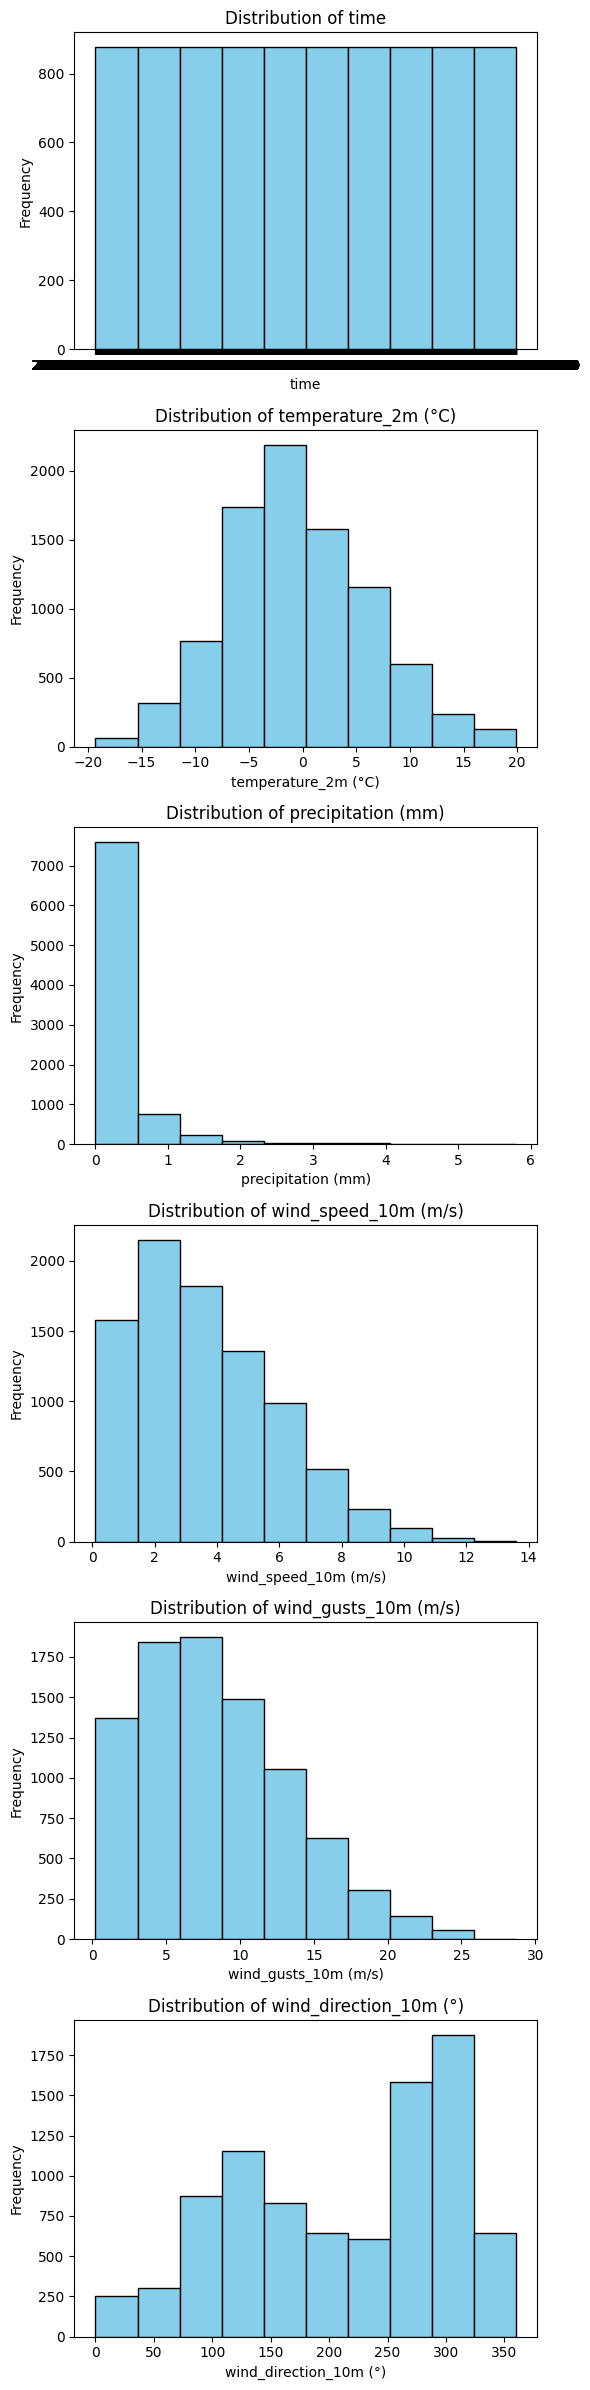

In [17]:
n_cols = df.shape[1]
fig, axes = plt.subplots(n_cols, 1, figsize=(6, 4 * n_cols))
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We observe that the time distribution is uniform, the temperature distibution is normally ditributed, percipitation, wind speed and wind gust all have right tails, and the wind direction has a bimodal distribution.

To plot all columns together we will normalize the data using MinMaxScaler from scikitLearn. We will also drop the time column from the plot as it is uniform and will not add any information to the plot.

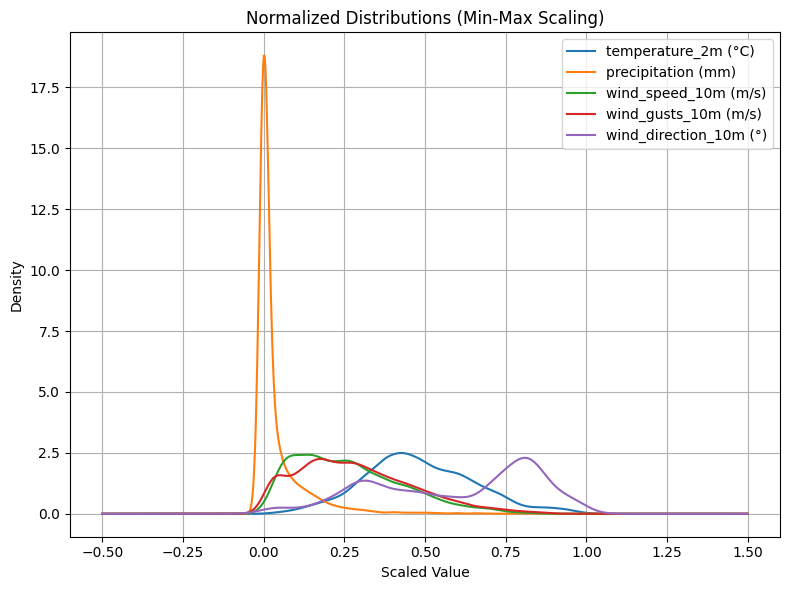

In [26]:

scaler = MinMaxScaler()

df.drop(['time'], axis=1, inplace=True)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot all scaled columns as KDEs
plt.figure(figsize=(8, 6))

for col in df_scaled.columns:
    df_scaled[col].plot(kind='kde', label=col)

plt.title('Normalized Distributions (Min-Max Scaling)')
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()